<a href="https://colab.research.google.com/github/dcrp1234/Machine-Learning/blob/main/Cats_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:17<00:00, 27.0MB/s]
100% 1.06G/1.06G [00:17<00:00, 66.5MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
#generator
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#Normalize
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
#Create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size =(3,3), padding='valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding = 'valid'))

model.add(Conv2D(64, kernel_size =(3,3), padding='valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding = 'valid'))

model.add(Conv2D(128, kernel_size =(3,3), padding='valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation ="relu"))
model.add(Dense(64, activation ="relu"))
model.add(Dense(1, activation ="sigmoid"))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [9]:
model.compile(optimizer = 'adam', loss ="binary_crossentropy", metrics = ['accuracy'])

In [10]:
history = model.fit(train_ds, epochs =10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 65s 91ms/step - loss: 0.6477 - accuracy: 0.6248 - val_loss: 0.6048 - val_accuracy: 0.6654
Epoch 2/10
625/625 [==============================] - 51s 82ms/step - loss: 0.5270 - accuracy: 0.7397 - val_loss: 0.5078 - val_accuracy: 0.7582
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.4107 - accuracy: 0.8091 - val_loss: 0.4883 - val_accuracy: 0.7788
Epoch 4/10
625/625 [==============================] - 54s 86ms/step - loss: 0.2676 - accuracy: 0.8856 - val_loss: 0.5959 - val_accuracy: 0.7672
Epoch 5/10
625/625 [==============================] - 54s 86ms/step - loss: 0.1366 - accuracy: 0.9472 - val_loss: 0.9324 - val_accuracy: 0.7524
Epoch 6/10
625/625 [==============================] - 53s 84ms/step - loss: 0.0932 - accuracy: 0.9678 - val_loss: 0.9917 - val_accuracy: 0.7684
Epoch 7/10
625/625 [==============================] - 52s 83ms/step - loss: 0.0529 - accuracy: 0.9819 - val_loss: 1.2807 - val_accuracy:

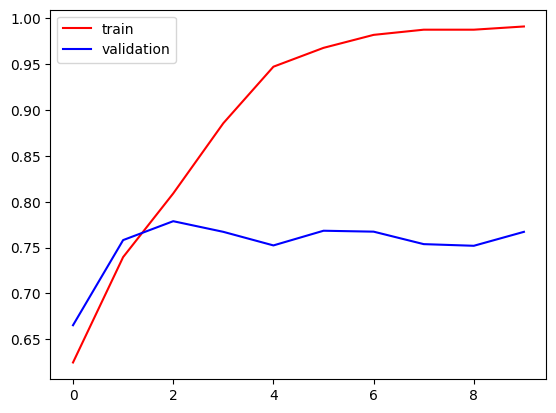

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color="blue", label = 'validation')
plt.legend()
plt.show()

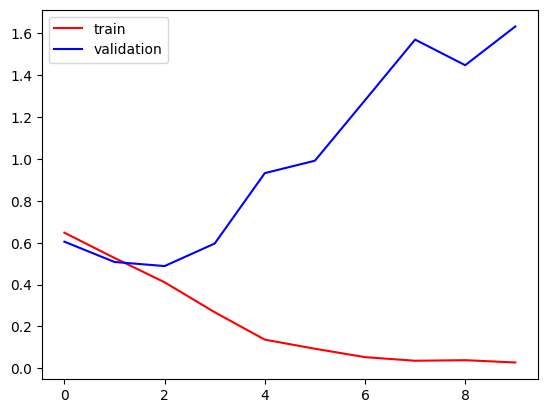

In [12]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color="blue", label = 'validation')
plt.legend()
plt.show()

Graphs show a large gap between the train data and validation data due to overfitting.

In [13]:
#Batch Normalization and DropOut
#Create CNN model to correct overfitting

model1 = Sequential()

model1.add(Conv2D(32, kernel_size =(3,3), padding='valid', activation = 'relu', input_shape = (256, 256, 3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2), strides=2, padding = 'valid'))

model1.add(Conv2D(64, kernel_size =(3,3), padding='valid', activation = 'relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2), strides=2, padding = 'valid'))

model1.add(Conv2D(128, kernel_size =(3,3), padding='valid', activation = 'relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2), strides=2, padding = 'valid'))

model1.add(Flatten())

model1.add(Dense(128, activation ="relu"))
model1.add(Dropout(0.1))
model1.add(Dense(64, activation ="relu"))
model1.add(Dropout(0.1))
model1.add(Dense(1, activation ="sigmoid"))

In [14]:
model.summary()
model.compile(optimizer = 'adam', loss ="binary_crossentropy", metrics = ['accuracy'])
history = model.fit(train_ds, epochs =10, validation_data=validation_ds)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

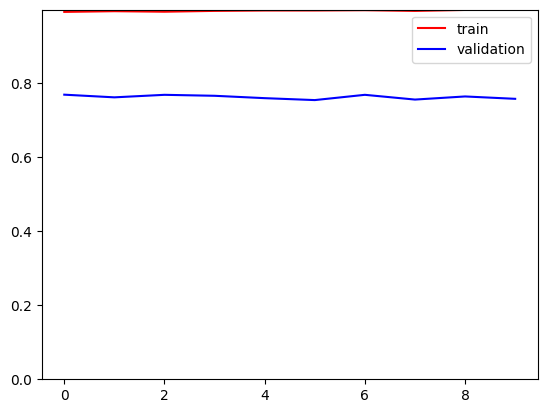

In [15]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color="blue", label = 'validation')
plt.legend()
plt.ylim(0, max(max(history.history['accuracy']), max(history.history['val_accuracy'])))  # Adjust ylim to start from 0
plt.show()

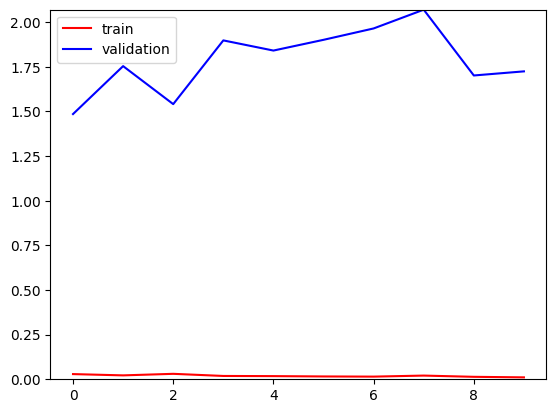

In [16]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color="blue", label = 'validation')
plt.legend()
plt.ylim(0, max(max(history.history['loss']), max(history.history['val_loss'])))  # Adjust ylim to start from 0
plt.show()

Verifying Accuracy with new images for cats and dogs

In [17]:
import cv2

(1144, 1600, 3)

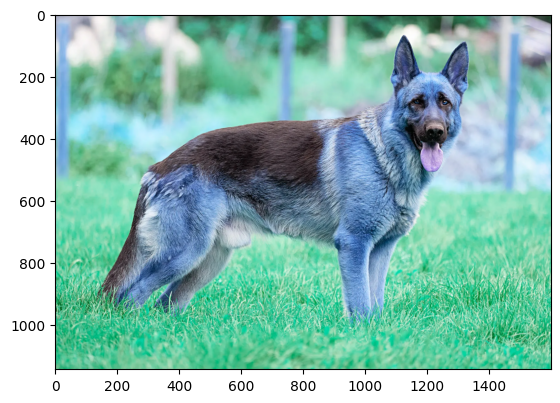

In [20]:
test_img = cv2.imread('/content/Dog.png')
plt.imshow(test_img)
test_img.shape

In [21]:
test_img = cv2.resize(test_img, (256,256))
test_input = test_img.reshape((1, 256, 256,3))

In [29]:
def result(value):
  if value== 1.0:
    return "Dog"
  return "Cat"

In [31]:
value = model1.predict(test_input)
result(value)

1/1 [==============================] - 0s 21ms/step


'Dog'

1/1 [==============================] - 0s 30ms/step


'Cat'

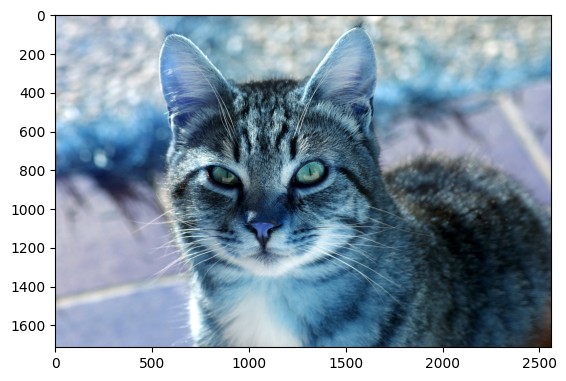

In [32]:
test_img = cv2.imread('/content/Cat.png')
plt.imshow(test_img)
test_img.shape
test_img = cv2.resize(test_img, (256,256))
test_input = test_img.reshape((1, 256, 256,3))
value = model1.predict(test_input)
result(value)